### Importing all necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

### Generate points for S_1

In [2]:
def generateNumbers(x_min, x_max,number_of_points):
    points = np.random.randint(x_min, x_max, number_of_points)
    return points

### Calculating Probability distribution function

In [3]:
# Will store x values in 0th index and cumulative value till that point in 1th index
def generateCDF(pmf):
    cdf = []
    cum_sum = 0
    for index in range(len(pmf)):

        # make a fresh list to store cdf at a particular point
        cdf_at_x = []
        
        # first append the x value
        cdf_at_x.append(pmf[index][0])

        cum_sum += pmf[index][1]
        # then append the corresponding cdf value
        cdf_at_x.append(cum_sum)

        # finally append it to the cdf function
        cdf.append(cdf_at_x)

    cdf = np.array(cdf)
    return cdf

### Generates points within given range and returns

In [4]:
def generatePoints(x_min, x_max,number_of_points):
    points = np.random.randint(x_min, x_max, number_of_points)
    return points

#### Generating S_1
    at x_min, x_max = -750, 750
    number_of_points = 5000
    bin_size = 5

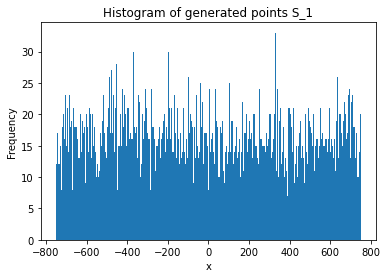

In [5]:
x_min, x_max = -750, 750
number_of_points_P = 5000
bin_size = 5

# Store the generated points into S_1
S_1 = generatePoints(x_min, x_max, number_of_points_P)

# plot the histogram for the generated points
plt.hist(S_1, bins = int((x_max-x_min)/bin_size))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of generated points S_1')
plt.show()

# Calculate and store x_values and bin_frequncies
hist, bin_edges = np.histogram(S_1, bins = int((x_max-x_min)/bin_size))

# probability mass function stores as (xi, Pi) where xi is event and Pi is probability of occuring the event 
pmf = [[(int(bin_edges[i]+bin_edges[i+1]))/2, hist[i]/number_of_points_P] for i in range(len(hist))]

# probability mass function of P
pmf_P = np.array(pmf)

# cumulative distribution of P
cdf_P = generateCDF(pmf_P)
# separate out the values and store into individual arrays x_values and probability_values
# x_values = np.array([pmf[i][0] for i in range(len(pmf))])
# prob_values = np.array([pmf[i][1] for i in range(len(pmf))])

### Generates random number the above generated distribution

In [6]:
def generateFromP(x_min, x_max, pmf, cdf, number_of_points):

    points = []
    
    # loop untill we generate required number of points
    while len(points) < number_of_points:
        
        # First generate a random value uniformly i.e. p~U(0,1)
        random_value = np.random.uniform(0,1)
        
        index = 0
        for index in range(len(pmf)): 
            # if we hit cdf valeu greater than random value then generate x from the formula
            
            if cdf[index][1] > random_value:
                
                # if we get the random_value is even less than the first cdf_value
                if index == 0:
                    x = ((random_value - 0)*(cdf[index][0] - x_min)/pmf[index][1]) + x_min
                else:
                    # since we are at (r+1) i.e. index so our calculation will be in index and index -1
                    x = ((random_value - cdf[index-1][1])*(cdf[index][0] - cdf[index-1][0])/pmf[index][1]) + cdf[index-1][0]
                
                # append the obtained x into points and break from loop to generate the next point
                points.append(x)
                
                break
    
    points = np.array(points)
    
    return points

#### Generating Q (will be stored in S_2) from the distribution of P (which having points in S_1)
     at x_min, x_max = -750, 750
        number_of_points = 3000
        bin_size = 10

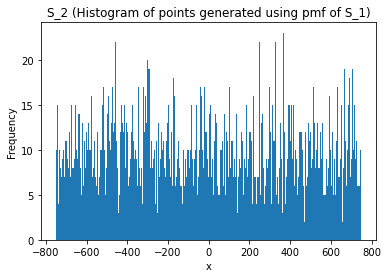

In [7]:
x_min, x_max = -750, 750
number_of_points_Q = 3000
bin_size = 5
# Store the generated points into S_2
S_2 = generateFromP(x_min, x_max, pmf_P, cdf_P, number_of_points_Q)

# plot the histogram for the generated points
plt.hist(S_2, bins = int((x_max-x_min)/bin_size))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('S_2 (Histogram of points generated using pmf of S_1)')
plt.show()

# Calculate and store x_values and bin_frequncies
hist, bin_edges = np.histogram(S_2, bins = int((x_max-x_min)/bin_size))

# probability mass function stores as (xi, Pi) where xi is event and Pi is probability of occuring the event 
pmf = [[(int(bin_edges[i]+bin_edges[i+1]))/2, hist[i]/number_of_points_Q] for i in range(len(hist))]

# probability mass function of Q
pmf_Q = np.array(pmf)

# cumulative distribution of PQ
cdf_Q = generateCDF(pmf_Q)

### Comparing the Distributions #1

In [8]:
# Calculate number of bins
number_of_bins = int((x_max-x_min)/bin_size)

# store the multiple and sqaure root into BC_sequence for final summation
BC_sequence = np.array([(pmf_P[i][1]*pmf_Q[i][1])**0.50 for i in range(number_of_bins)])

# sum all the elements obtained in BC_sequence
BC_of_PQ = sum(BC_sequence)

# Print result
print('Result')
print(f'\nx_min : {x_min} \tx_max : {x_max} \tbin size : {bin_size}')
print(f'\nFor P\nn : {number_of_points_P} \n')
print(f"\nFor Q\nn' : {number_of_points_Q} \n")
print(f'Bhattacharya Coefficient : {BC_of_PQ}')

Result

x_min : -750 	x_max : 750 	bin size : 5

For P
n : 5000 


For Q
n' : 3000 

Bhattacharya Coefficient : 0.9855593128531851


### Comparing Distribution #2:

#### Generating S_1
    at x_min, x_max = -750, 750
    number_of_points = 6000
    bin_size = 4

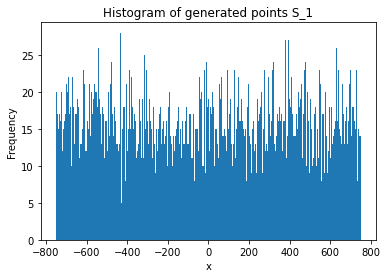

In [9]:
# Execution begins here
x_min, x_max = -750, 750
number_of_points_P = 6000
bin_size = 4

# Store the generated points into S_1
S_1 = generatePoints(x_min, x_max, number_of_points_P)

# plot the histogram for the generated points
plt.hist(S_1, bins = int((x_max-x_min)/bin_size))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of generated points S_1')
plt.show()

# Calculate and store x_values and bin_frequncies
hist, bin_edges = np.histogram(S_1, bins = int((x_max-x_min)/bin_size))

# probability mass function stores as (xi, Pi) where xi is event and Pi is probability of occuring the event 
pmf = [[(int(bin_edges[i]+bin_edges[i+1]))/2, round(hist[i]/number_of_points_P, 5)] for i in range(len(hist))]

# probability mass function of P
pmf_P = np.array(pmf)

# cumulative distribution of P
cdf_P = generateCDF(pmf_P)

#### Generating Q (will be stored in S_2) from the distribution of P (which having points in S_1)
     at x_min, x_max = -750, 750
        number_of_points = 4000
        bin_size = 4

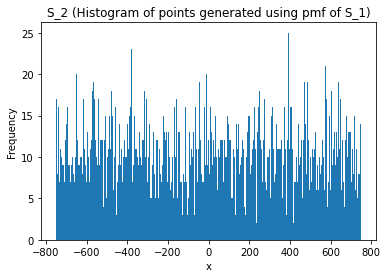

In [10]:
x_min, x_max = -750, 750
number_of_points_Q = 4000
bin_size = 4
# Store the generated points into S_2
S_2 = generateFromP(x_min, x_max, pmf_P, cdf_P, number_of_points_Q)

# plot the histogram for the generated points
plt.hist(S_2, bins = int((x_max-x_min)/bin_size))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('S_2 (Histogram of points generated using pmf of S_1)')
plt.show()

# Calculate and store x_values and bin_frequncies
hist, bin_edges = np.histogram(S_2, bins = int((x_max-x_min)/bin_size))

# probability mass function stores as (xi, Pi) where xi is event and Pi is probability of occuring the event 
pmf = [[(int(bin_edges[i]+bin_edges[i+1]))/2, round(hist[i]/number_of_points_Q, 5)] for i in range(len(hist))]

# probability mass function of Q
pmf_Q = np.array(pmf)

# cumulative distribution of Q
cdf_Q = generateCDF(pmf_Q)

#### Calculating Bhattacharya Coefficient and Results

In [11]:
# Calculate number of bins
number_of_bins = int((x_max-x_min)/bin_size)

# store the multiple and sqaure root into BC_sequence for final summation
BC_sequence = np.array([(pmf_P[i][1]*pmf_Q[i][1])**0.50 for i in range(number_of_bins)])

# sum all the elements obtained in BC_sequence
BC_of_PQ = sum(BC_sequence)

# Print result
print('Result')
print(f'\nx_min : {x_min} \tx_max : {x_max} \tbin size : {bin_size}')
print(f'\nFor P\nn : {number_of_points_P} \n')
print(f"\nFor Q\nn' : {number_of_points_Q} \n")
print(f'Bhattacharya Coefficient : {BC_of_PQ}')

Result

x_min : -750 	x_max : 750 	bin size : 4

For P
n : 6000 


For Q
n' : 4000 

Bhattacharya Coefficient : 0.9859367950455357


#### Comparing Distribution #3:

#### Generating S_1
    at x_min, x_max = -750, 750
    number_of_points = 4000
    bin_size = 10

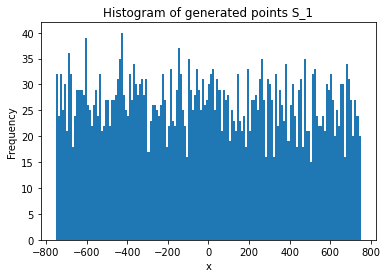

In [12]:
# Execution begins here
x_min, x_max = -750, 750
number_of_points_P = 4000
bin_size = 10

# Store the generated points into S_1
S_1 = generatePoints(x_min, x_max, number_of_points_P)

# plot the histogram for the generated points
plt.hist(S_1, bins = int((x_max-x_min)/bin_size))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of generated points S_1')
plt.show()

# Calculate and store x_values and bin_frequncies
hist, bin_edges = np.histogram(S_1, bins = int((x_max-x_min)/bin_size))

# probability mass function stores as (xi, Pi) where xi is event and Pi is probability of occuring the event 
pmf = [[(int(bin_edges[i]+bin_edges[i+1]))/2, round(hist[i]/number_of_points_P, 5)] for i in range(len(hist))]

# probability mass function of P
pmf_P = np.array(pmf)

# cumulative distribution of P
cdf_P = generateCDF(pmf_P)

#### Generating Q (will be stored in S_2) from the distribution of P (which having points in S_1)
     at x_min, x_max = -750, 750
        number_of_points = 2500
        bin_size = 10

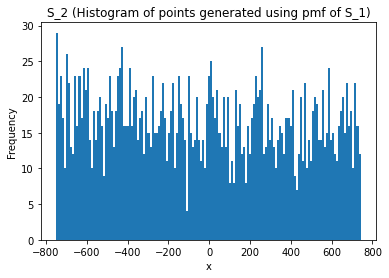

In [13]:
x_min, x_max = -750, 750
number_of_points_Q = 2500
bin_size = 10
# Store the generated points into S_2
S_2 = generateFromP(x_min, x_max, pmf_P, cdf_P, number_of_points_Q)

# plot the histogram for the generated points
plt.hist(S_2, bins = int((x_max-x_min)/bin_size))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('S_2 (Histogram of points generated using pmf of S_1)')
plt.show()

# Calculate and store x_values and bin_frequncies
hist, bin_edges = np.histogram(S_2, bins = int((x_max-x_min)/bin_size))

# probability mass function stores as (xi, Pi) where xi is event and Pi is probability of occuring the event 
pmf = [[(int(bin_edges[i]+bin_edges[i+1]))/2, round(hist[i]/number_of_points_Q, 5)] for i in range(len(hist))]

# probability mass function of Q
pmf_Q = np.array(pmf)

# cumulative distribution of Q
cdf_Q = generateCDF(pmf_Q)

#### Calculating Bhattacharya Coefficient and Results

In [14]:
# Calculate number of bins
number_of_bins = int((x_max-x_min)/bin_size)

# store the multiple and sqaure root into BC_sequence for final summation
BC_sequence = np.array([(pmf_P[i][1]*pmf_Q[i][1])**0.50 for i in range(number_of_bins)])

# sum all the elements obtained in BC_sequence
BC_of_PQ = sum(BC_sequence)

# Print result
print('Result')
print(f'\nx_min : {x_min} \tx_max : {x_max} \tbin size : {bin_size}')
print(f'\nFor P\nn : {number_of_points_P} \n')
print(f"\nFor Q\nn' : {number_of_points_Q} \n")
print(f'Bhattacharya Coefficient : {BC_of_PQ}')

Result

x_min : -750 	x_max : 750 	bin size : 10

For P
n : 4000 


For Q
n' : 2500 

Bhattacharya Coefficient : 0.9931067473271663


### Comparing Distribution #4:

#### Generating S_1
    at x_min, x_max = -750, 750
    number_of_points = 10000
    bin_size = 20

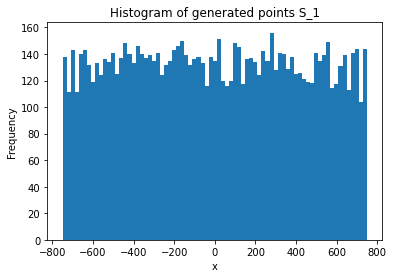

In [15]:
# Execution begins here
x_min, x_max = -750, 750
number_of_points_P = 10000
bin_size = 20

# Store the generated points into S_1
S_1 = generatePoints(x_min, x_max, number_of_points_P)

# plot the histogram for the generated points
plt.hist(S_1, bins = int((x_max-x_min)/bin_size))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of generated points S_1')
plt.show()

# Calculate and store x_values and bin_frequncies
hist, bin_edges = np.histogram(S_1, bins = int((x_max-x_min)/bin_size))

# probability mass function stores as (xi, Pi) where xi is event and Pi is probability of occuring the event 
pmf = [[(int(bin_edges[i]+bin_edges[i+1]))/2, round(hist[i]/number_of_points_P, 5)] for i in range(len(hist))]

# probability mass function of P
pmf_P = np.array(pmf)

# cumulative distribution of P
cdf_P = generateCDF(pmf_P)

#### Generating Q (will be stored in S_2) from the distribution of P (which having points in S_1)
     at x_min, x_max = -750, 750
        number_of_points = 8000
        bin_size = 20

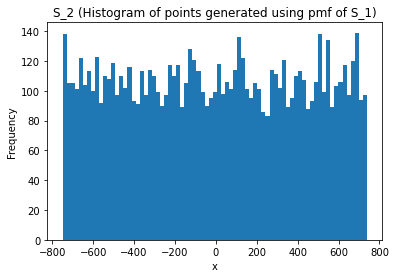

In [16]:
x_min, x_max = -750, 750
number_of_points_Q = 8000
bin_size = 20
# Store the generated points into S_2
S_2 = generateFromP(x_min, x_max, pmf_P, cdf_P, number_of_points_Q)

# plot the histogram for the generated points
plt.hist(S_2, bins = int((x_max-x_min)/bin_size))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('S_2 (Histogram of points generated using pmf of S_1)')
plt.show()

# Calculate and store x_values and bin_frequncies
hist, bin_edges = np.histogram(S_2, bins = int((x_max-x_min)/bin_size))

# probability mass function stores as (xi, Pi) where xi is event and Pi is probability of occuring the event 
pmf = [[(int(bin_edges[i]+bin_edges[i+1]))/2, round(hist[i]/number_of_points_Q, 5)] for i in range(len(hist))]

# probability mass function of Q
pmf_Q = np.array(pmf)

# cumulative distribution of Q
cdf_Q = generateCDF(pmf_Q)

#### Calculating Bhattacharya Coefficient and Results

In [17]:
# Calculate number of bins
number_of_bins = int((x_max-x_min)/bin_size)

# store the multiple and sqaure root into BC_sequence for final summation
BC_sequence = np.array([(pmf_P[i][1]*pmf_Q[i][1])**0.50 for i in range(number_of_bins)])

# sum all the elements obtained in BC_sequence
BC_of_PQ = sum(BC_sequence)

# Print result
print('Result')
print(f'\nx_min : {x_min} \tx_max : {x_max} \tbin size : {bin_size}')
print(f'\nFor P\nn : {number_of_points_P} \n')
print(f"\nFor Q\nn' : {number_of_points_Q} \n")
print(f'Bhattacharya Coefficient : {BC_of_PQ}')

Result

x_min : -750 	x_max : 750 	bin size : 20

For P
n : 10000 


For Q
n' : 8000 

Bhattacharya Coefficient : 0.9981459029153776
